<a href="https://colab.research.google.com/github/lalopezpa/AlgorithmsUN2022II/blob/main/lalopezpa_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
#%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

In [ ]:
pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.2 MB/s 


In [ ]:
%reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [ ]:
import time #for time calcs

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time
matmul(a, b)

CPU times: user 33 µs, sys: 4 µs, total: 37 µs
Wall time: 42 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time
matmul(a, b)

IndexError: ignored

**My own example 3 - Chekcing the matrix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    if  len(A[0]) == len(B):
     for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
     return out
    else:
      return 'Not compatibility matrix A and B'

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time
matmul(a, b)

CPU times: user 13 µs, sys: 1e+03 ns, total: 14 µs
Wall time: 19.3 µs


'Not compatibility matrix A and B'

**My own example 5 - Deifining A and B that are compatiible for multiplcation**

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [5, 6, 5, 2]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time
matmul(a, b)

CPU times: user 40 µs, sys: 5 µs, total: 45 µs
Wall time: 49.4 µs


[[20, 26, 26, 20], [28, 37, 38, 31], [52, 70, 74, 64], [8, 11, 12, 11]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.2218079736071743, 0.17549977386324667, 0.1658736910034454],
 [0.3217108698692607, 0.0512712580294733, 0.18536301661996613]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)

In [ ]:
st = time.time()
for i in range(10):
 matmul(randa, randb)
et = time.time()

elapsed_time_Py = (et - st)/10
print('Execution time:', elapsed_time_Py, 'seconds')

Execution time: 8.425662899017334 seconds


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
languages = {'Nombre':['Python'],'Average': [elapsed_time_Py]}
df = pd.DataFrame(data=languages)
df

,Nombre,Average
0,Python,8.425663


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
st = time.time()
for i in range(10):
 np.matmul(randa, randb)
et = time.time()

elapsed_time_Np = (et - st)/10
print('Execution time:', elapsed_time_Np, 'seconds')

Execution time: 0.018251252174377442 seconds


In [ ]:
df2 = pd.DataFrame({'Nombre':['NumPy'],'Average': [elapsed_time_Np]})
df = df.append(df2)
df

,Nombre,Average
0,Python,8.425663
0,NumPy,0.018251


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 8.26 s, sys: 27 ms, total: 8.29 s
Wall time: 8.3 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 13.4 ms, sys: 1.01 ms, total: 14.4 ms
Wall time: 15.8 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 174 µs, sys: 0 ns, total: 174 µs
Wall time: 178 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A = random_matrix(2, 2)
B = random_matrix(2, 2)

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul(xs, ys, result)
  double precision, intent(in) :: xs(:, :)
  double precision, intent(in) :: ys(:, :)
  double precision, dimension(size(xs, 1), size(ys, 2)), intent(out) :: result

  if (size(xs, 2) == size(ys, 1)) then
    do row = 1, size(xs, 1)
      do col = 1, size(ys, 2)
        do colxs = 1, size(xs, 2)
          result(row, col) = result(row, col) + xs(row, colxs) * ys(colxs, col)
        end do
      end do
    end do
  end if
 
end

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
mat_a = np.array([[1, 2], [3, 4]])
mat_b = np.array([[5, 6], [7, 8]])
fortran_matmul(mat_a, mat_b)

array([[19., 22.],
       [43., 50.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul(xs, ys, result)
  double precision, intent(in) :: xs(:, :)
  double precision, intent(in) :: ys(:, :)
  double precision, dimension(size(xs, 1), size(ys, 2)), intent(out) :: result

  if (size(xs, 2) == size(ys, 1)) then
    do row = 1, size(xs, 1)
      do col = 1, size(ys, 2)
        do colxs = 1, size(xs, 2)
          result(row, col) = result(row, col) + xs(row, colxs) * ys(colxs, col)
        end do
      end do
    end do
  end if
 
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
rand_a = random_matrix(600, 100)
rand_b = random_matrix(100, 600)
fortran_matmul(rand_a, rand_b)

array([[23.89846984, 26.78853314, 26.27876217, ..., 26.12390029,
        24.0540507 , 29.85894033],
       [19.05271049, 23.67670195, 21.47856666, ..., 21.06936903,
        21.05337517, 24.34896454],
       [20.50996113, 25.53690329, 23.22086816, ..., 23.04144939,
        22.78494262, 27.10285566],
       ...,
       [20.94384495, 25.84935357, 21.71628653, ..., 23.89317856,
        22.4549315 , 26.65665732],
       [22.0238939 , 25.0426303 , 22.02092293, ..., 23.57425224,
        21.42341787, 27.60443885],
       [25.01199727, 28.14866999, 23.87910288, ..., 26.29410791,
        23.56397141, 29.62145453]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
st = time.time()
for i in range(10):
 fortran_matmul(randa, randb)
et = time.time()

elapsed_time_Ft = (et - st)/10
df3 = pd.DataFrame({'Nombre':['Fortran'],'Average': [elapsed_time_Ft]})
df = df.append(df3)
df

,Nombre,Average
0,Python,8.425663
0,NumPy,0.018251
0,Fortran,0.088444


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%fortran
subroutine fortran_ten_matmul(xs, ys, result)
  double precision, intent(in) :: xs(:, :)
  double precision, intent(in) :: ys(:, :)
  double precision, dimension(size(xs, 1), size(ys, 2)), intent(out) :: result

  if (size(xs, 2) == size(ys, 1)) then
    do i = 1, 10
      do row = 1, size(xs, 1)
        do col = 1, size(ys, 2)
          do colxs = 1, size(xs, 2)
            result(row, col) = result(row, col) + xs(row, colxs) * ys(colxs, col)
          end do
        end do
      end do
    end do
  end if
 
end

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
fortran_matmul(rand_a, rand_b)

array([[23.89846984, 26.78853314, 26.27876217, ..., 26.12390029,
        24.0540507 , 29.85894033],
       [19.05271049, 23.67670195, 21.47856666, ..., 21.06936903,
        21.05337517, 24.34896454],
       [20.50996113, 25.53690329, 23.22086816, ..., 23.04144939,
        22.78494262, 27.10285566],
       ...,
       [20.94384495, 25.84935357, 21.71628653, ..., 23.89317856,
        22.4549315 , 26.65665732],
       [22.0238939 , 25.0426303 , 22.02092293, ..., 23.57425224,
        21.42341787, 27.60443885],
       [25.01199727, 28.14866999, 23.87910288, ..., 26.29410791,
        23.56397141, 29.62145453]])

**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
st = time.time()
fortran_ten_matmul(rand_a, rand_b)
et = time.time()

elapsed_time_Ftr = (et - st)/10
df4 = pd.DataFrame({'Nombre':['Fortran_insideLoop'],'Average': [elapsed_time_Ftr]})
df = df.append(df4)
df

,Nombre,Average
0,Python,8.425663
0,NumPy,0.018251
0,Fortran,0.088444
0,Fortran_insideLoop,0.081581


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmpc.c       
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define R1 600           // number of rows in Matrix-1
#define C1 100            // number of columns in Matrix-1
#define R2 100           // number of rows in Matrix-2
#define C2 600

void main() {
srand(time(NULL));
int mat1[R1][C1];
int mat2[R2][C2];

for (int i = 0; i< R1; i++){
  for(int j = 0; j< C1; j++){
    int n = rand() % 10;
    mat1[i][j]=n;
        
  }

}     

  for (int i = 0; i< R2; i++){
  for(int j = 0; j< C2; j++){
    int p = rand() % 10;
    mat2[i][j]=p;
          
  }
      
}     
      

int rslt[R1][C2];
    
  for (int i = 0 ; i < R1 ; i++ ){
    for (int k = 0 ; k < C2 ; k++ ) {
        rslt[i][k] = 0;
        for (int j = 0 ; j < R2 ; j++ ) {                          
          rslt[i][k] += mat1[i][j] * mat2[j][k];
        }
        }
}
}


Writing tmpc.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc tmpc.c -o tmpc
st = time.time()
for i in range(10):
 !./tmpc
et = time.time()
elapsed_time_c = (et - st)/10
print('Execution time:', elapsed_time_c, 'seconds')

Execution time: 0.21824312210083008 seconds


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
df5 = pd.DataFrame({'Nombre':['C'],'Average': [elapsed_time_c]})
df = df.append(df5)
df

,Nombre,Average
0,Python,8.425663
0,NumPy,0.018251
0,Fortran,0.088444
0,Fortran_insideLoop,0.081581
0,C,0.218243


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmpcc.cc      
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define R1 600           // number of rows in Matrix-1
#define C1 100            // number of columns in Matrix-1
#define R2 100           // number of rows in Matrix-2
#define C2 600

int main() {
srand(time(NULL));
int mat1[R1][C1];
int mat2[R2][C2];

for (int i = 0; i< R1; i++){
  for(int j = 0; j< C1; j++){
    int n = rand() % 10;
    mat1[i][j]=n;   
  }
}     

  for (int i = 0; i< R2; i++){
  for(int j = 0; j< C2; j++){
    int p = rand() % 10;
    mat2[i][j]=p;      
  }    
}     
      
int rslt[R1][C2];  
  for (int i = 0 ; i < R1 ; i++ ){
    for (int k = 0 ; k < C2 ; k++ ) {
        rslt[i][k] = 0;
        for (int j = 0 ; j < R2 ; j++ ) {                          
          rslt[i][k] += mat1[i][j] * mat2[j][k];
        }
        }
}
}


Writing tmpcc.cc


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ tmpcc.cc -o tmpcc
st = time.time()
for i in range(10):
 !./tmpcc
et = time.time()
elapsed_time_cc = (et - st)/10
print('Execution time:', elapsed_time_cc, 'seconds')

Execution time: 0.21786808967590332 seconds


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
df6 = pd.DataFrame({'Nombre':['C++'],'Average': [elapsed_time_cc]})
df = df.append(df6)
df

,Nombre,Average
0,Python,8.425663
0,NumPy,0.018251
0,Fortran,0.088444
0,Fortran_insideLoop,0.081581
0,C,0.218243
0,C++,0.217868


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile Main.java
class main{
  public static void main(String[] args) {
    int[][] a= new int[600][100];
    for (int x=0; x < a.length; x++) {
      for (int y=0; y < a[x].length; y++) {
        a[x][y] = (int) (Math.random()*9+1);
      }
    }
    int[][] b= new int[100][600];
    for (int x=0; x < b.length; x++) {
      for (int y=0; y < b[x].length; y++) {
        b[x][y] = (int) (Math.random()*9+1);
      }
    } 
    int[][] c = multiply(a, b);
  }

  public static int[][] multiply(int[][] a, int[][] b) {
  int[][] c = new int[a.length][b[0].length];
  if (a[0].length == b.length) {
    for (int i=0; i<10; i++){
      for (int l = 0; l < a.length; l++) {
          for (int j = 0; j < b[0].length; j++) {
              for (int k = 0; k < a[0].length; k++) {
                  // aquí se multiplica la matriz
                  c[i][j] += a[i][k] * b[k][j];
              }
          }
      }
    }
  }
  return c;
  }
}

Writing Main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!java Main.java
st = time.time()
!node Main.java
et = time.time()
elapsed_time_java = (et - st)/10
print('Execution time:', elapsed_time_java, 'seconds')

/content/Main.java:2
  public static void main(String[] args) {
         ^^^^^^

SyntaxError: Unexpected strict mode reserved word
    at wrapSafe (internal/modules/cjs/loader.js:979:16)
    at Module._compile (internal/modules/cjs/loader.js:1027:27)
    at Object.Module._extensions..js (internal/modules/cjs/loader.js:1092:10)
    at Module.load (internal/modules/cjs/loader.js:928:32)
    at Function.Module._load (internal/modules/cjs/loader.js:769:14)
    at Function.executeUserEntryPoint [as runMain] (internal/modules/run_main.js:72:12)
    at internal/main/run_main_module.js:17:47
Execution time: 0.012126350402832031 seconds


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
df7 = pd.DataFrame({'Nombre':['Java'],'Average': [elapsed_time_java]})
df = df.append(df7)
df

,Nombre,Average
0,Python,8.425663
0,NumPy,0.018251
0,Fortran,0.088444
0,Fortran_insideLoop,0.081581
0,C,0.218243
0,C++,0.217868
0,Java,0.012126


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmp.js
var R1 = 600;
var C1 = 100;
var R2 = 100;
var C2 = 600;


function mulMat(mat1, mat2)
{
    
    var rslt = Array(R1).fill(0).map(()=>new Array(C2).fill(0));
    var i = 0;
    var j = 0;
    var k = 0;
    for (iter = 1; iter < 11; iter ++) {
      for (i = 0; i < R1; i++) {
        for (j = 0; j < C2; j++) {
            rslt[i][j] = 0;
            for (k = 0; k < R2; k++) {
                rslt[i][j] += mat1[i][k] * mat2[k][j];
            }
            //console.log(rslt[i][j] + " ");
        }
      }
      //console.log('Iteration', iter)
    }
    
    
}

mat1 = Array.from({length: R1}, () => Array.from({length: C1}, () => Math.random()));
mat2 = Array.from({length: R2}, () => Array.from({length: C2}, () => Math.random()));

mulMat(mat1, mat2);


Writing tmp.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node tmp.js


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
st = time.time()
!node tmp.js
et = time.time()
elapsed_time_js = (et - st)/10
df8 = pd.DataFrame({'Nombre':['JavaScript'],'Average': [elapsed_time_js]})
df = df.append(df8)
df

,Nombre,Average
0,Python,8.425663
0,NumPy,0.018251
0,Fortran,0.088444
0,Fortran_insideLoop,0.081581
0,C,0.218243
0,C++,0.217868
0,Java,0.012126
0,JavaScript,0.384474


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
df.Average.min()

0.018251252174377442

**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
avgs = df.Average
speed_f = [elapsed_time_Py/i for i in avgs]
df['Speed Factor'] = speed_f
df

,Nombre,Average,Speed Factor
0,Python,8.425663,1.000000
0,NumPy,0.018251,461.648484
0,Fortran,0.088444,95.265517
0,Fortran_insideLoop,0.081581,103.279755
0,C,0.218243,38.606774
0,C++,0.217868,38.673231
0,Java,0.012126,694.822648
0,JavaScript,0.384474,21.914799


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
df.sort_values(by=['Average'])

,Nombre,Average,Speed Factor
0,Java,0.012126,694.822648
0,NumPy,0.018251,461.648484
0,Fortran_insideLoop,0.081581,103.279755
0,Fortran,0.088444,95.265517
0,C++,0.217868,38.673231
0,C,0.218243,38.606774
0,JavaScript,0.384474,21.914799
0,Python,8.425663,1.000000


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 132 µs, sys: 1 ms, total: 1.14 ms
Wall time: 1.15 ms


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 1.28 ms, total: 1.28 ms
Wall time: 1.39 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 171 µs, sys: 2 µs, total: 173 µs
Wall time: 177 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0351342014387896

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-07,154.970001,157.259995,154.389999,156.690002,155.816895,82278300
2021-09-08,156.979996,157.039993,153.979996,155.110001,154.245667,74420200
2021-09-09,155.490005,156.110001,153.949997,154.070007,153.211487,57305700
2021-09-10,155.000000,155.479996,148.699997,148.970001,148.139893,140893200
2021-09-13,150.630005,151.419998,148.750000,149.550003,148.716660,102404300


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Open,High
Date,,
2021-09-07,154.970001,157.259995
2021-09-08,156.979996,157.039993


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

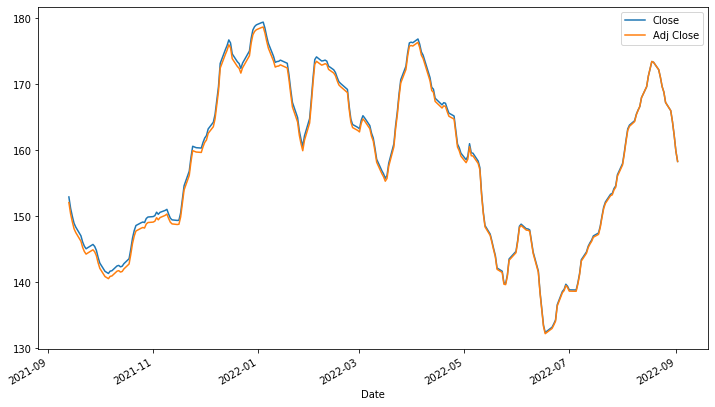

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

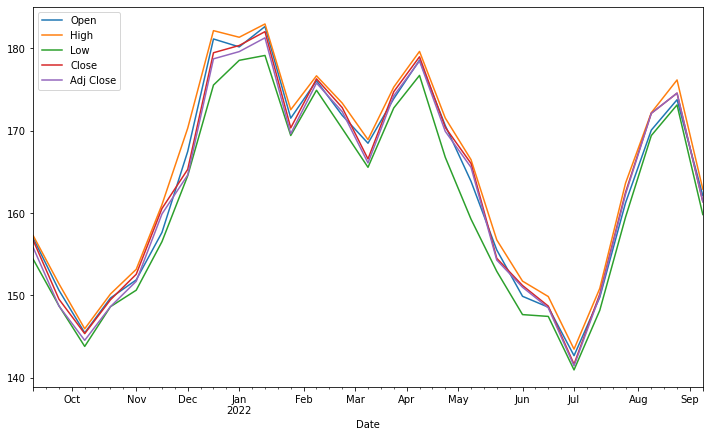

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

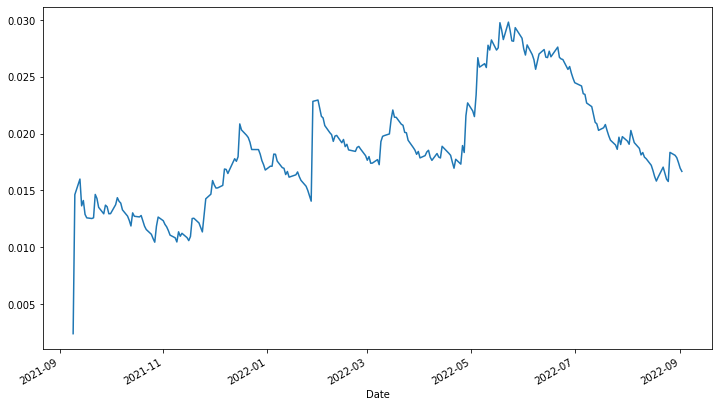

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

ModuleNotFoundError: ignored

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!